<a href="https://colab.research.google.com/github/dmunozbe/TFM_DataScience/blob/main/NB_SuperficieVerde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Superficie Verde.** Indicador nº 85 de la ISO-37120:

De acuerdo con el objetivo principal del presente TFM, se han recopilado datos de las zonas verdes de Barcelona a nivel de distrito facilitadas por el   Ajuntament de Barcelona. Ecologia Urbana. Direcció de Serveis d'Espais Verds i Biodiversitat a traves del portal [www.barcelona.cat
](https://ajuntament.barcelona.cat/estadistica/castella/Estadistiques_per_temes/Medi_urba/Territori/Zones_verdes_i_platges/C0104.htm).

## Carga del conjunto de datos


Cargamos en un dataframe el xlsx obtenidos desde el año 2000 hasta 2021 el area de zonas verdes  y el area de zonas verdes por habitante en la ciudad de Barcelona

In [1]:
# Importamos las librerias necesarias
#import requests
import os
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import geopandas as gpd
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import viridis
import warnings

In [2]:
def cargar_xlsx(ruta):
    try:
        # Cargar el archivo CSV en un DataFrame de pandas
        dataframe = pd.read_excel(ruta)
        return dataframe
    except Exception as e:
        print("Error al cargar el archivo CSV:", e)
        return None

In [3]:
# Directorio del indicador 1
directorio ='/content/drive/MyDrive/UOC/TFM/Datasets Indicadores/Básico/Panificación Urbana/Indicador_85_zonasVerdes'

# Lista de archivos CSV en el directorio
archivos_xlsx = [archivo for archivo in os.listdir(directorio) if archivo.endswith('.xlsx')]

# Lista para almacenar los DataFrames de cada archivo CSV
dfs = []

# Iterar sobre cada archivo CSV y cargarlo en un DataFrame
for archivo in archivos_xlsx:
    ruta_archivo = os.path.join(directorio, archivo)
    df = cargar_xlsx(ruta_archivo)
    dfs.append(df)

# Concatenar todos los DataFrames en un solo DataFrame
df_final = pd.concat(dfs, ignore_index=True)

In [4]:
# Mostramos las primeras filas del dataframe
df_final.head()

,Codi_Districte,Nom_Districte,Any,Zona Verde (m²),m² por habitante
0,1,CiutatVella,2000,623200,7.4
1,1,CiutatVella,2001,624300,7.4
2,1,CiutatVella,2002,624100,6.4
3,1,CiutatVella,2003,625100,5.9
4,1,CiutatVella,2004,625100,5.8


In [5]:
# Observamos el numero y los nombres de los atributos, el numero de filas y si hay missing-values o no
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Codi_Districte    220 non-null    int64  
 1   Nom_Districte     220 non-null    object 
 2   Any               220 non-null    int64  
 3   Zona Verde (m²)   220 non-null    int64  
 4   m² por habitante  220 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 8.7+ KB


El dataset se compone de un total de 9 columnas:

*   **Codi_Districte:** Codigo del distrito de Barcelona
*   **Nom_Districte:** Nombre del distrito de Barcelona
*   **Any:** Año en el que se recogieron los datos
*   **Zona Verde (m²):** Area de zonas verdes
*   **m² por habitante:** Area de zonas verdes por habitante

In [6]:
# Analizamos las variables numericas
df_final.describe()

,Codi_Districte,Any,Zona Verde (m²),m² por habitante
count,220.000000,220.000000,2.200000e+02,220.000000
mean,5.500000,2010.500000,1.087897e+06,6.930227
std,2.878832,6.358757,7.643062e+05,3.992048
min,1.000000,2000.000000,3.650000e+05,1.800000
25%,3.000000,2005.000000,5.722070e+05,4.000000
50%,5.500000,2010.500000,8.104200e+05,6.450000
75%,8.000000,2016.000000,1.233552e+06,7.700000
max,10.000000,2021.000000,3.269237e+06,18.000000


Analizando cada una de las variables numericas vemos que la variable:
*   **Codi_Districte:** aunque es una variable numerica corresponde con valores categoricos.
*   **Any:** es integra y contiene la información correcta.
*   **Zona Verde (m²):** es integra y contiene la información correcta.
*   **m² por habitante:** es integra y contiene la información correcta.

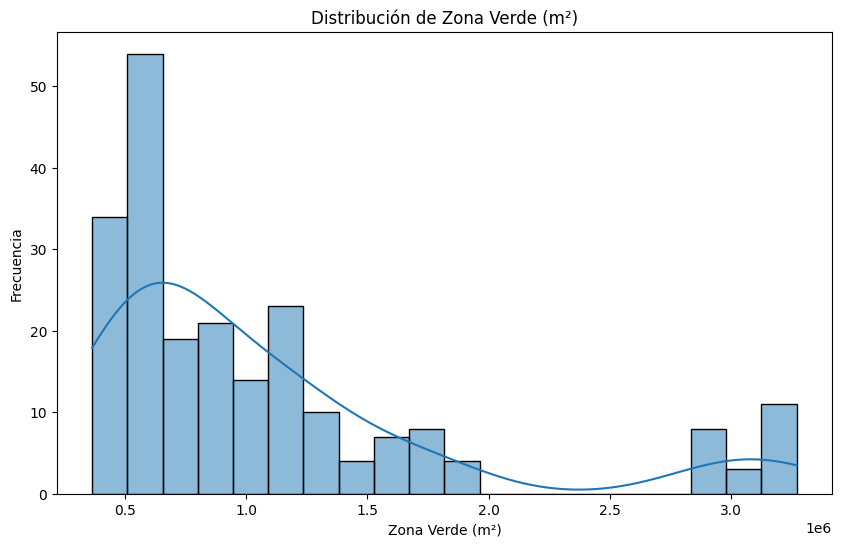

In [7]:
# Visualizamos la distribución de la principal variable numerica con un histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_final['Zona Verde (m²)'], bins=20, kde=True)
plt.title('Distribución de Zona Verde (m²)')
plt.xlabel('Zona Verde (m²)')
plt.ylabel('Frecuencia')
plt.show()

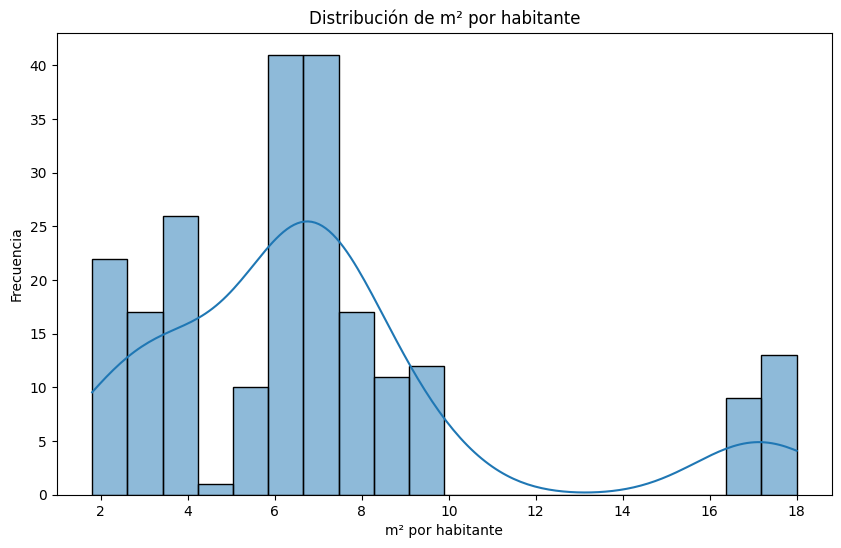

In [8]:
# Visualizamos la distribución de la principal variable numerica con un histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_final['m² por habitante'], bins=20, kde=True)
plt.title('Distribución de m² por habitante')
plt.xlabel('m² por habitante')
plt.ylabel('Frecuencia')
plt.show()

## Limpieza de datos

Verificamos que si hay datos faltantes

In [9]:
df_final.isnull().sum()

Codi_Districte      0
Nom_Districte       0
Any                 0
Zona Verde (m²)     0
m² por habitante    0
dtype: int64

Dado que se trata de un dataset obtenido de un excel manipulado, los datos no necesitan limpieza de datos


## Creación de .csv

Obtenemos el archivo datosParticipacion.csv con los datos del dataframe resultante

In [10]:
# Guardar el DataFrame en un archivo CSV
df_final.to_csv('/content/drive/MyDrive/UOC/TFM/Datasets definitivos/datos_85_ZonasVerdes.csv', index=False)

## Análisis Exploratorio de Datos (EDA)

Una vez tenemos los datos limpios continuamos con la exploracion inicial de los datos

### Variable continua Area de Zona Verde (m²) (Zona Verde (m²))

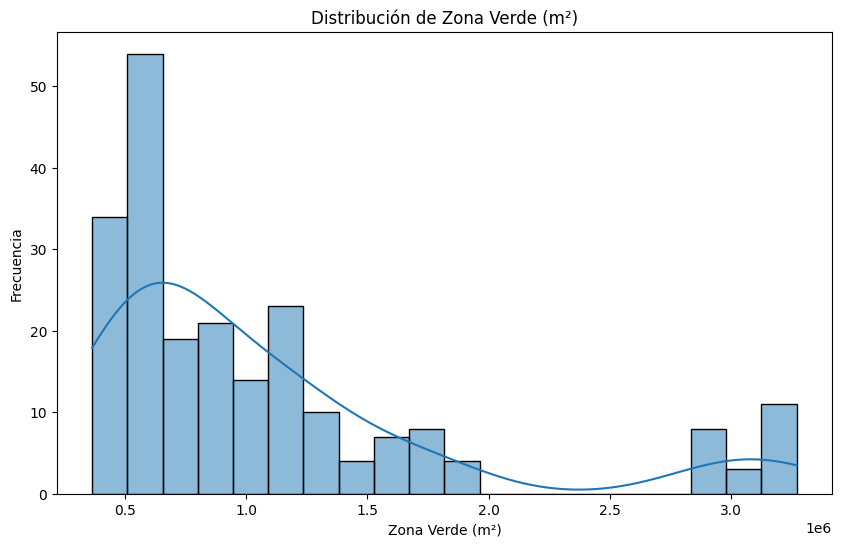

In [11]:
# Visualizamos la distribución de la principal variable numerica con un histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_final['Zona Verde (m²)'], bins=20, kde=True)
plt.title('Distribución de Zona Verde (m²)')
plt.xlabel('Zona Verde (m²)')
plt.ylabel('Frecuencia')
plt.show()

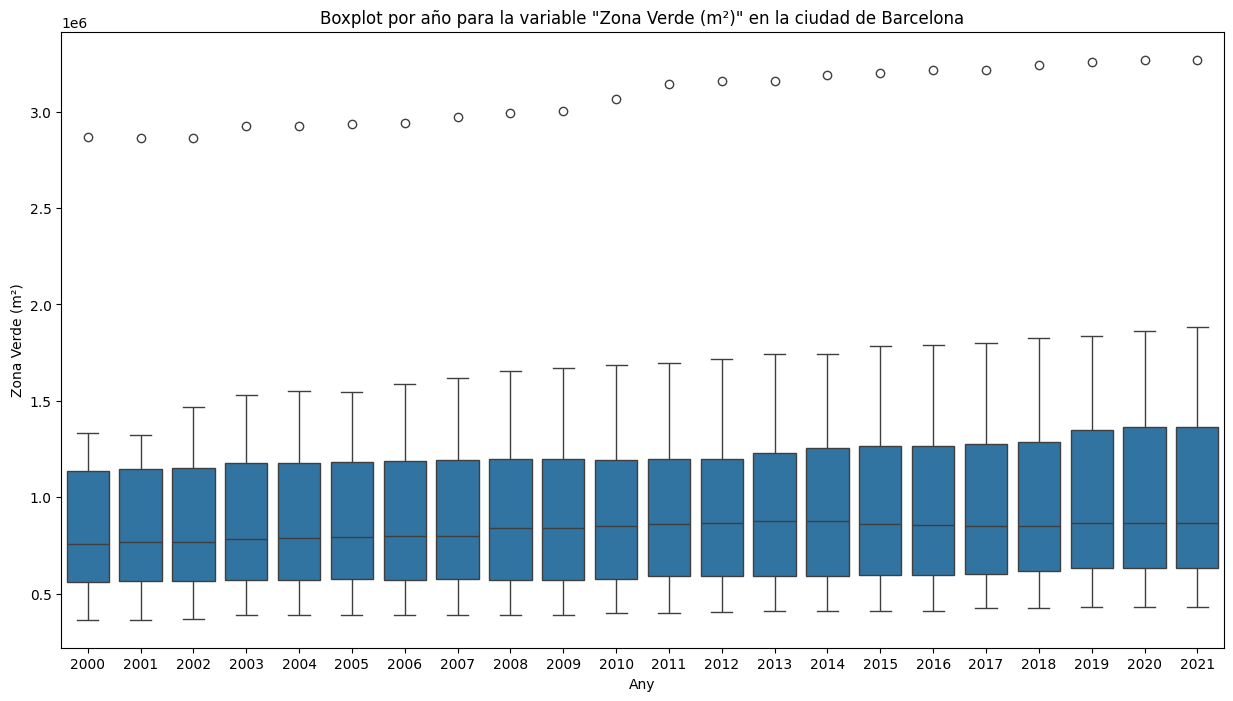

In [12]:
# Crear diagrama de caja para la variable continua "ParadosReg" en funcion de la variable categorica "Any"
plt.figure(figsize=(15, 8))
sns.boxplot(x='Any', y='Zona Verde (m²)', data=df_final)
plt.title('Boxplot por año para la variable "Zona Verde (m²)" en la ciudad de Barcelona')

# Mostrar el diagrama de caja
plt.show()

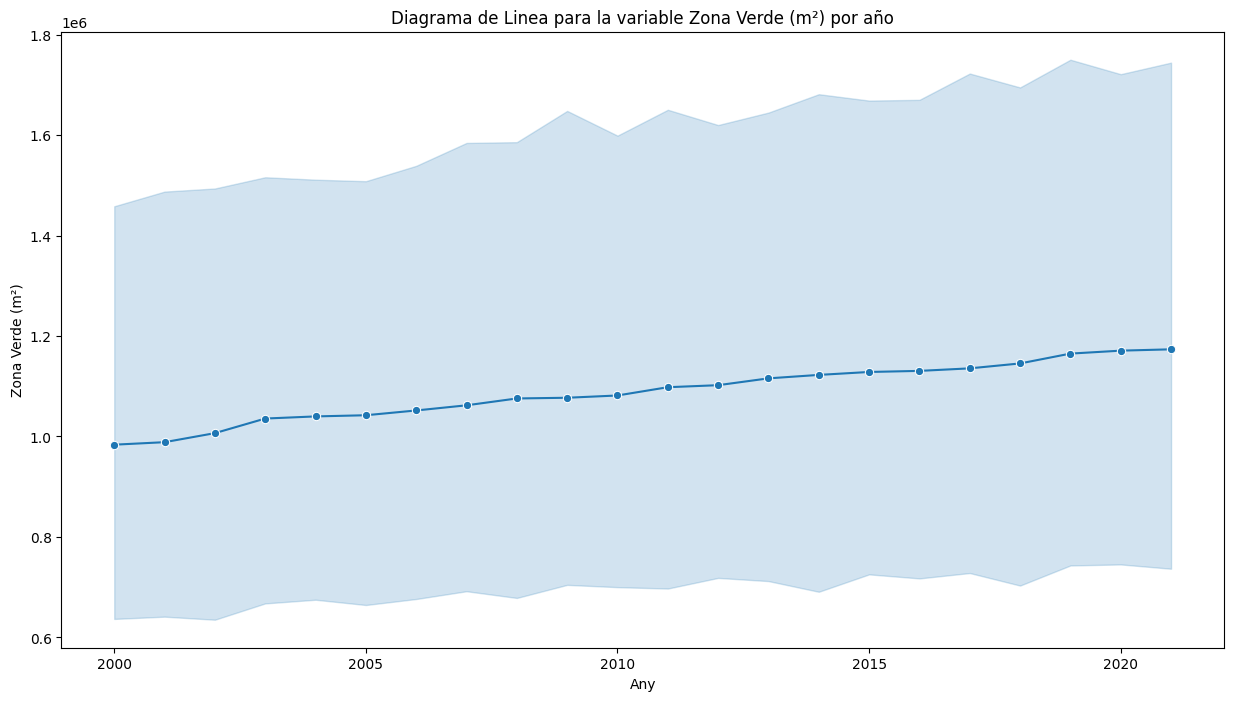

In [13]:
# Creamos un diagrama de linea
plt.figure(figsize=(15, 8))
sns.lineplot(data=df_final, x='Any', y='Zona Verde (m²)', marker='o')# Graficar los valores de la variable continua
plt.title('Diagrama de Linea para la variable Zona Verde (m²) por año')
plt.xlabel('Any')
plt.ylabel('Zona Verde (m²)')

plt.show()

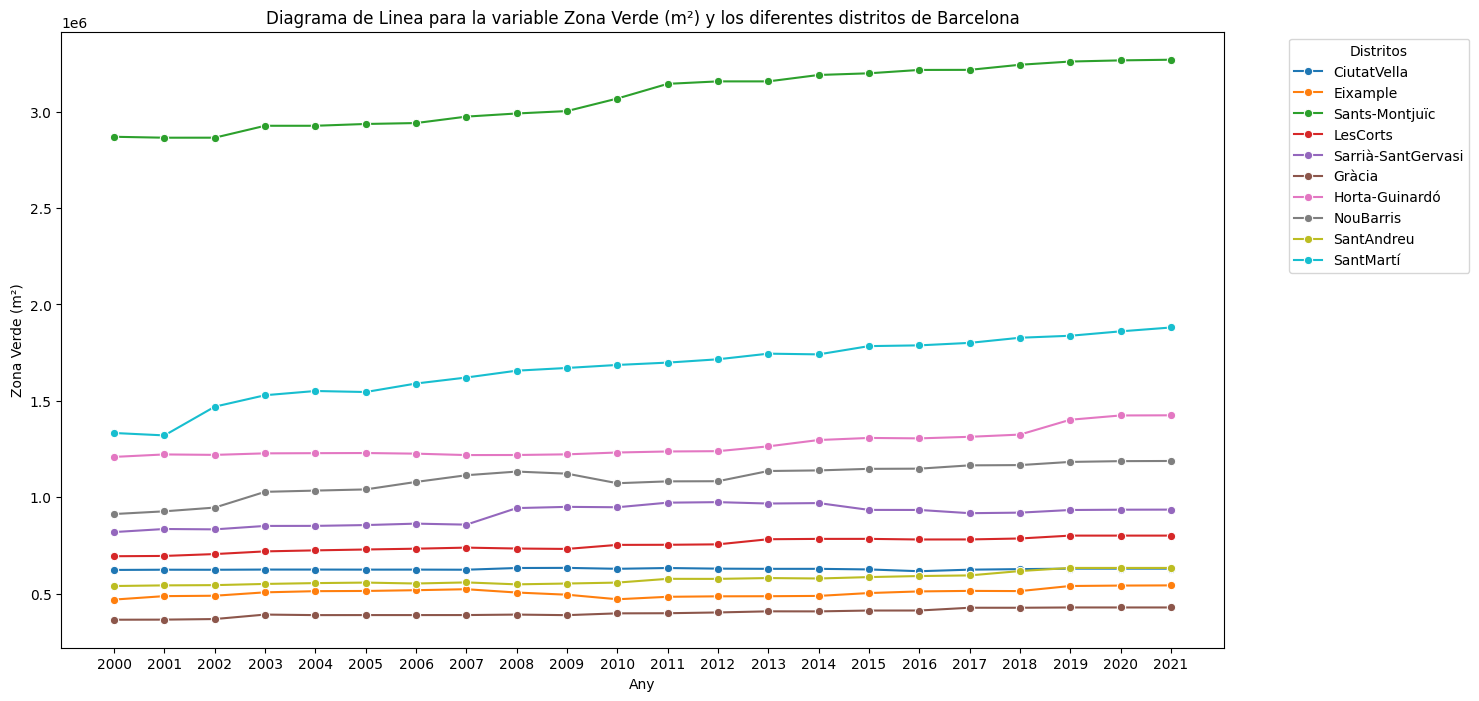

In [14]:
# Creamos un diagrama de linea
plt.figure(figsize=(15, 8))


sns.lineplot(data=df_final, x='Any', y='Zona Verde (m²)', hue='Nom_Districte', marker='o')# Graficar los valores de la variable continua
plt.title('Diagrama de Linea para la variable Zona Verde (m²) y los diferentes distritos de Barcelona')
plt.xlabel('Any')
plt.ylabel('Zona Verde (m²)')
plt.legend(title='Distritos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(df_final['Any'].unique())

# Sacamos la leyenda fuera del grafico

plt.show()

### Variable continua porcentaje solo con Estudios Obligatorios (Solo_Estudios_Obligatorios)

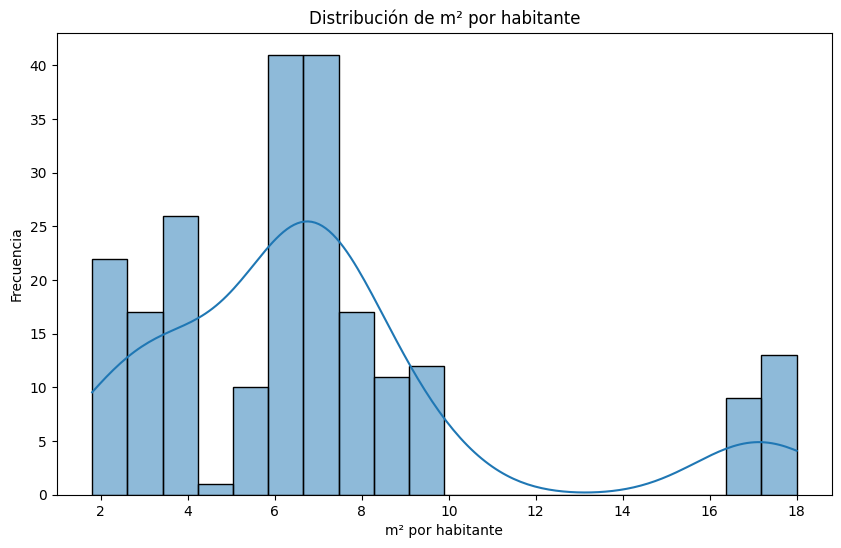

In [15]:
# Visualizamos la distribución de la principal variable numerica con un histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_final['m² por habitante'], bins=20, kde=True)
plt.title('Distribución de m² por habitante')
plt.xlabel('m² por habitante')
plt.ylabel('Frecuencia')
plt.show()

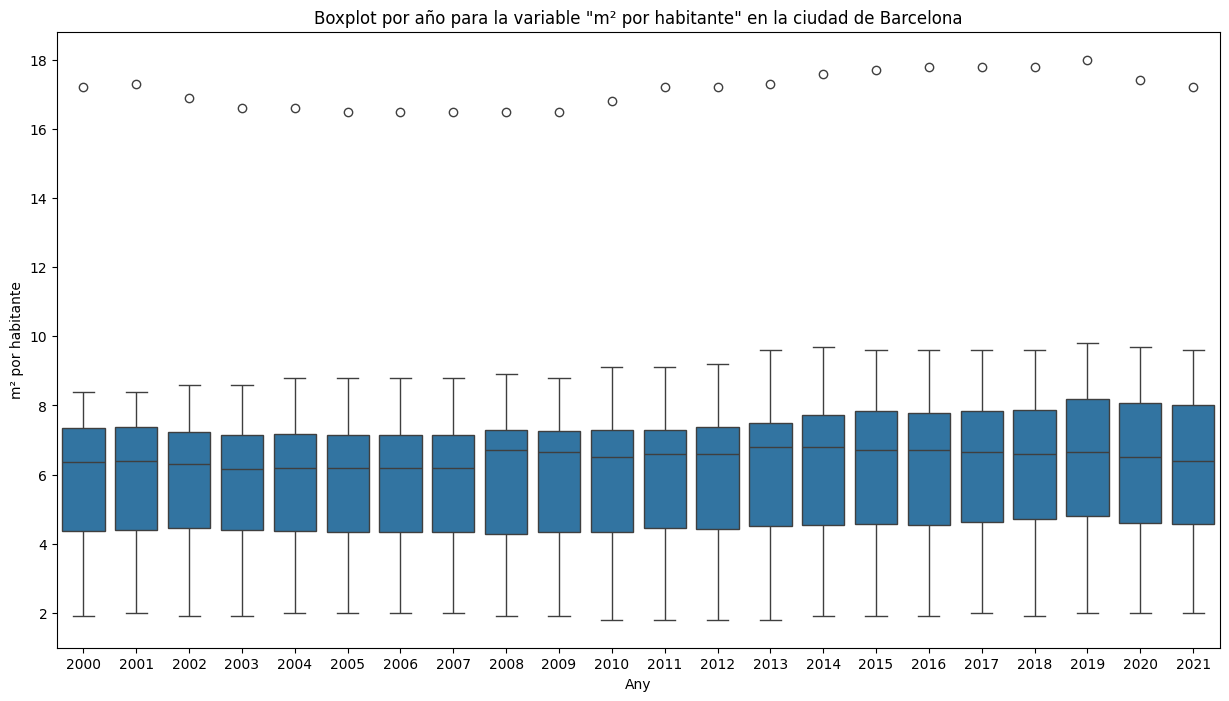

In [16]:
# Crear diagrama de caja para la variable continua "ParadosReg" en funcion de la variable categorica "Any"
plt.figure(figsize=(15, 8))
sns.boxplot(x='Any', y='m² por habitante', data=df_final)
plt.title('Boxplot por año para la variable "m² por habitante" en la ciudad de Barcelona')

# Mostrar el diagrama de caja
plt.show()

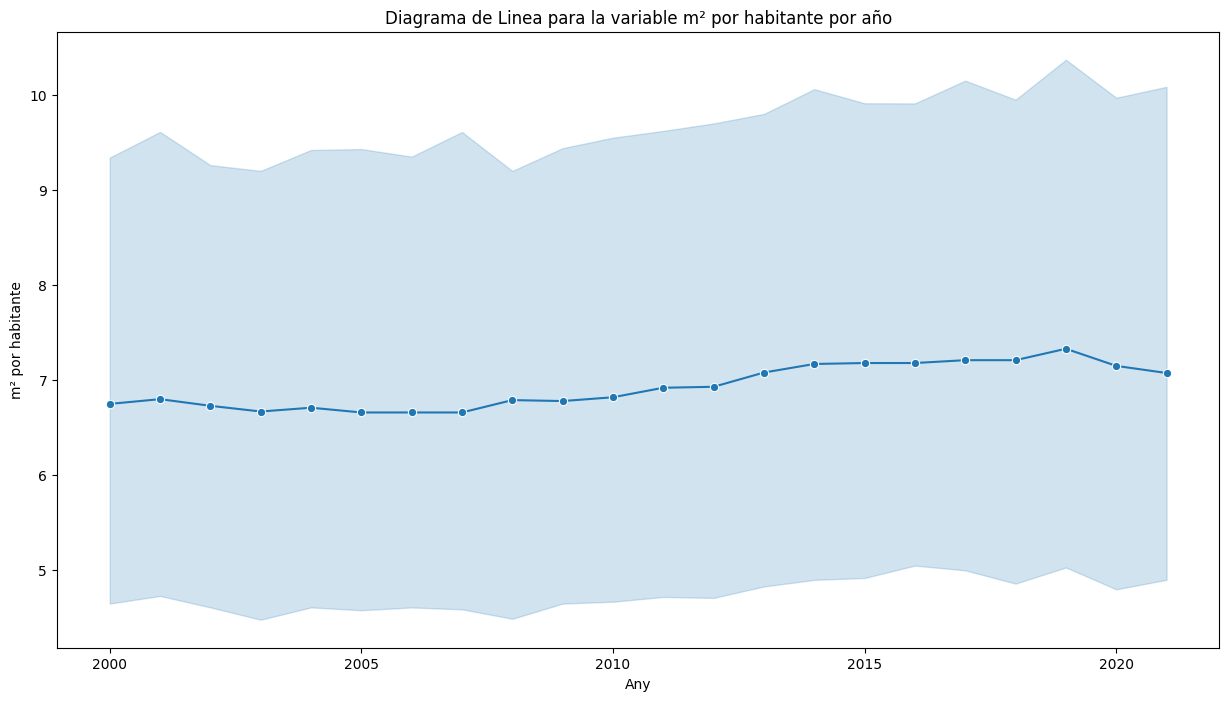

In [17]:
# Creamos un diagrama de linea
plt.figure(figsize=(15, 8))
sns.lineplot(data=df_final, x='Any', y='m² por habitante', marker='o')# Graficar los valores de la variable continua
plt.title('Diagrama de Linea para la variable m² por habitante por año')
plt.xlabel('Any')
plt.ylabel('m² por habitante')

plt.show()

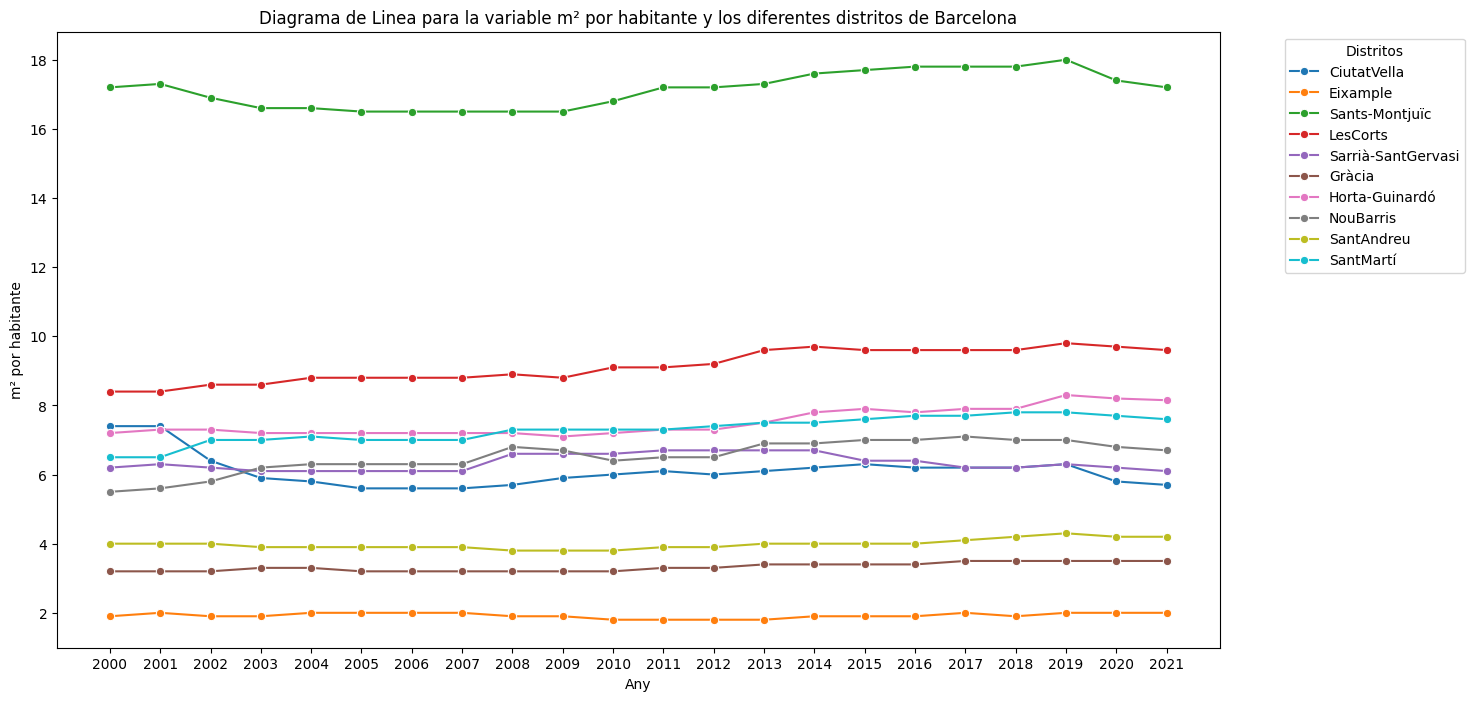

In [18]:
# Creamos un diagrama de linea
plt.figure(figsize=(15, 8))


sns.lineplot(data=df_final, x='Any', y='m² por habitante', hue='Nom_Districte', marker='o')# Graficar los valores de la variable continua
plt.title('Diagrama de Linea para la variable m² por habitante y los diferentes distritos de Barcelona')
plt.xlabel('Any')
plt.ylabel('m² por habitante')
plt.legend(title='Distritos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(df_final['Any'].unique())

# Sacamos la leyenda fuera del grafico

plt.show()

## Carga del Shapefile

Cargamos el archivo tipo shape con los 10 distritos de Barcelona

In [19]:
# Cargar el archivo shapefile de los distritos de Barcelona
barcelona_distritos = gpd.read_file("/content/drive/MyDrive/UOC/TFM/Datasets Indicadores/Grafo viario de las calles de la ciudad de Barcelona/BCN_UNITATS_ADM/0301040100_Districtes_UNITATS_ADM.shp")

# Mostrar información básica sobre el shapefile
barcelona_distritos.head()


,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,ELEM_DESCR,...,ESTIL_ID_V,ESTIL_QGIS,VALOR1QGIS,VALOR2QGIS,COL_FARCIT,FCOL_DESCR,FHEX_COLOR,COL_DESCR,HEX_COLOR7,geometry
0,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((431733.736 4582441.816, 431827.673 4..."
1,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((432033.184 4583665.032, 432032.069 4..."
2,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((428773.911 4580873.742, 428833..."
3,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((425054.670 4583672.560, 425062.830 4..."
4,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((422563.071 4587486.743, 422568..."


In [20]:
# Convertimos el tipo de valor de la variable distrito a entero
barcelona_distritos['DISTRICTE'] = barcelona_distritos['DISTRICTE'].astype(int)

In [21]:
# Mostramos la nomenclatura para los graficos posteriores
print (df_final[['Codi_Districte', 'Nom_Districte']].drop_duplicates().to_string(index=False))

 Codi_Districte      Nom_Districte
              1        CiutatVella
              2           Eixample
              3     Sants-Montjuïc
              4           LesCorts
              5 Sarrià-SantGervasi
              6             Gràcia
              7     Horta-Guinardó
              8          NouBarris
              9         SantAndreu
             10          SantMartí


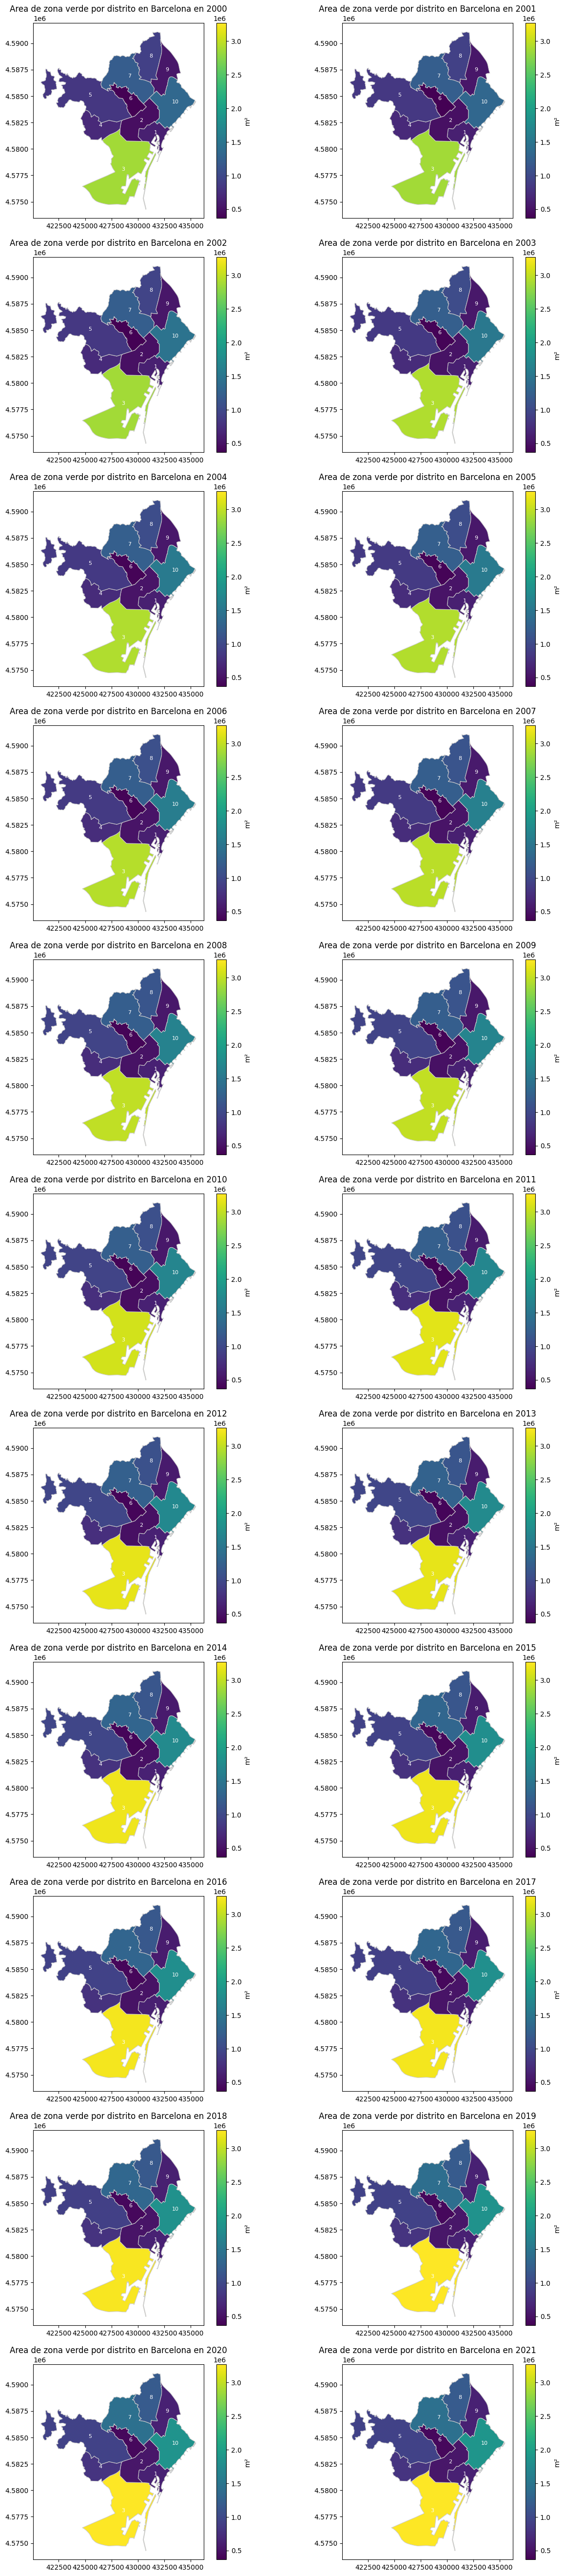

In [22]:
# Suprimir todas las advertencias
warnings.filterwarnings("ignore")

plt.figure(figsize=(15, 80))

# Definir el valor máximo y mínimo global
max_global = df_final['Zona Verde (m²)'].max()
min_global = df_final['Zona Verde (m²)'].min()

# Crear un colormap Viridis
viridis_cmap = viridis

# Iterar sobre cada año para crear un gráfico para cada uno
for i, year in enumerate(df_final['Any'].unique(), start=1):

    plt.subplot(13, 2, i)
    # Filtrar los datos para el año actual
    datos_year = df_final[df_final['Any'] == year]

    # Combinar los datos con el shapefile
    distritos_year = barcelona_distritos.merge(datos_year, how='left', left_on='DISTRICTE', right_on='Codi_Districte') # Combinar datos CSV y Shapefile

    # Añadir los nombres de los distritos
    for idx, row in barcelona_distritos.iterrows():
        plt.text(row.geometry.centroid.x, row.geometry.centroid.y, row['DISTRICTE'], fontsize=8, color='white')

    # Crear el mapa de los distritos de Barcelona en el año actual con colores
    plt.title(f"Area de zona verde por distrito en Barcelona en {year}")

    distritos_year.plot(ax=plt.gca(),column='Zona Verde (m²)', cmap=viridis_cmap, linewidth=0.8, edgecolor='0.8', norm=plt.Normalize(vmin=min_global, vmax=max_global))

    # Añadir una barra de color para mostrar la escala
    sm = plt.cm.ScalarMappable(cmap=viridis_cmap, norm=plt.Normalize(vmin=min_global, vmax=max_global))
    sm._A = []
    # Crear la leyenda con un gradiente de color
    cbar = plt.colorbar(sm, ax=plt.gca())
    cbar.set_label('m²')  # Establece el nombre de la variable



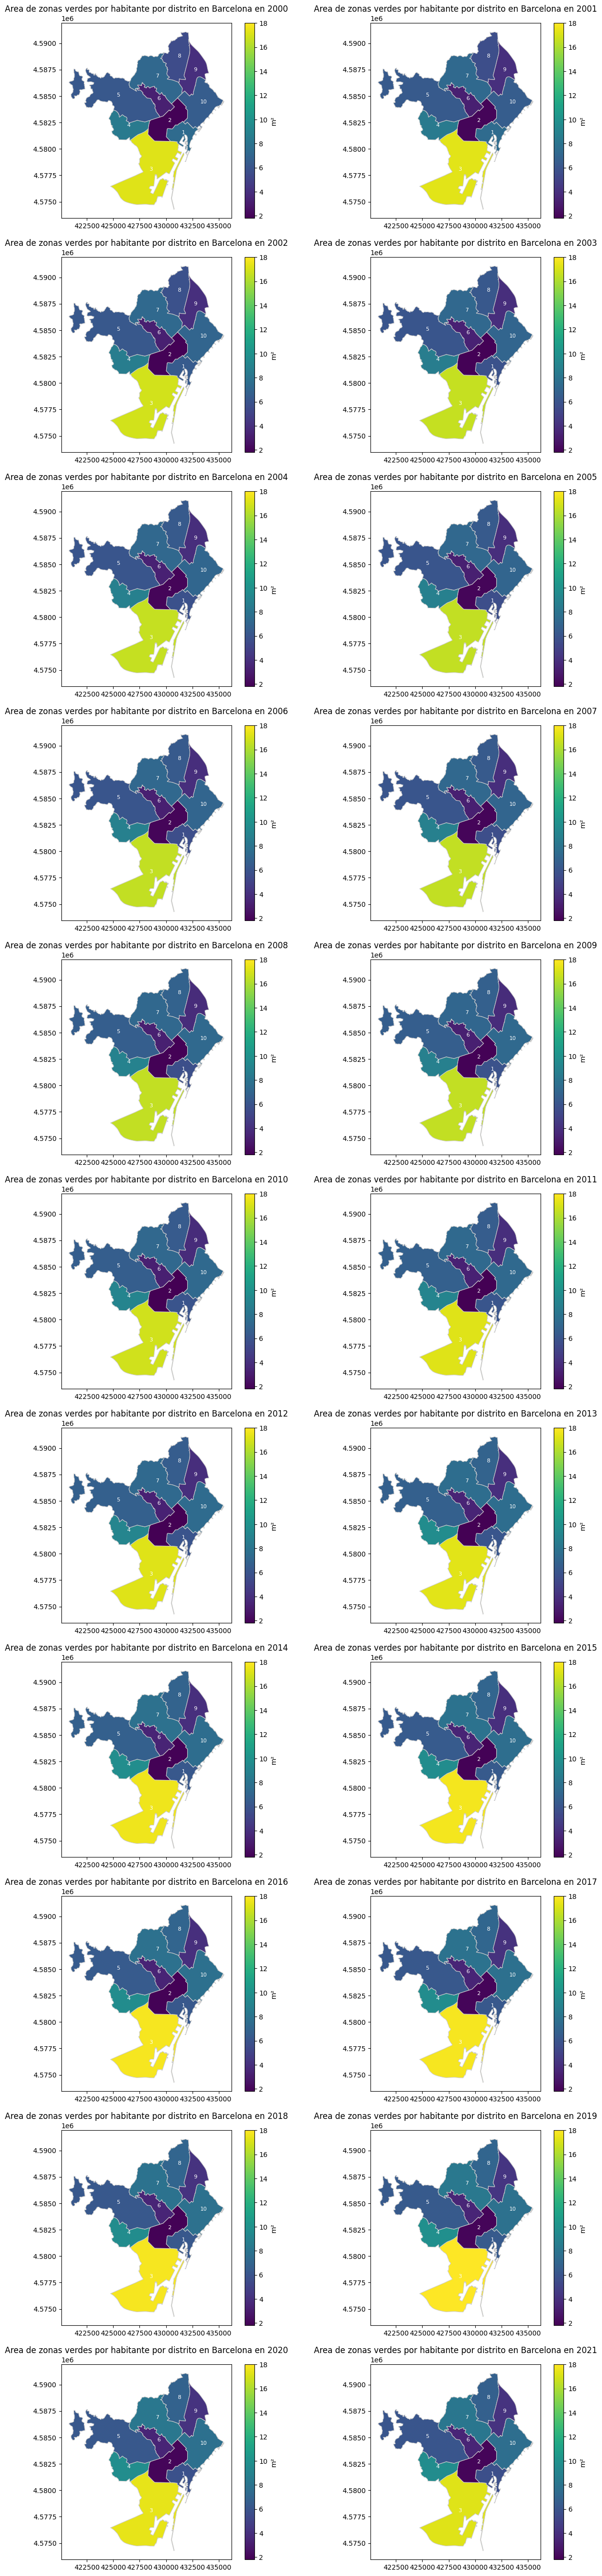

In [23]:
# Suprimir todas las advertencias
warnings.filterwarnings("ignore")

plt.figure(figsize=(15, 80))

# Definir el valor máximo y mínimo global
max_global = df_final['m² por habitante'].max()
min_global = df_final['m² por habitante'].min()

# Crear un colormap Viridis
viridis_cmap = viridis

# Iterar sobre cada año para crear un gráfico para cada uno
for i, year in enumerate(df_final['Any'].unique(), start=1):

    plt.subplot(13, 2, i)
    # Filtrar los datos para el año actual
    datos_year = df_final[df_final['Any'] == year]

    # Combinar los datos con el shapefile
    distritos_year = barcelona_distritos.merge(datos_year, how='left', left_on='DISTRICTE', right_on='Codi_Districte') # Combinar datos CSV y Shapefile

    # Añadir los nombres de los distritos
    for idx, row in barcelona_distritos.iterrows():
        plt.text(row.geometry.centroid.x, row.geometry.centroid.y, row['DISTRICTE'], fontsize=8, color='white')

    # Crear el mapa de los distritos de Barcelona en el año actual con colores
    plt.title(f"Area de zonas verdes por habitante por distrito en Barcelona en {year}")

    distritos_year.plot(ax=plt.gca(),column='m² por habitante', cmap=viridis_cmap, linewidth=0.8, edgecolor='0.8', norm=plt.Normalize(vmin=min_global, vmax=max_global))

    # Añadir una barra de color para mostrar la escala
    sm = plt.cm.ScalarMappable(cmap=viridis_cmap, norm=plt.Normalize(vmin=min_global, vmax=max_global))
    sm._A = []
    # Crear la leyenda con un gradiente de color
    cbar = plt.colorbar(sm, ax=plt.gca())
    cbar.set_label('m²')  # Establece el nombre de la variable

